# **Load & Combine Parcel Files Model** #

In [3]:
library(sf)
library(dplyr)

In [4]:
# List of county names (use your full list of counties)
county_names <- c('ADAMS', 'ALLEN', 'BARTHOLOMEW', 'BENTON', 'BLACKFORD', 'BOONE', 'BROWN', 
                  'CARROLL', 'CASS', 'CLARK', 'CLAY', 'CLINTON', 'CRAWFORD', 'DAVIESS', 'DEARBORN', 
                  'DECATUR', 'DEKALB', 'DELAWARE', 'DUBOIS', 'ELKHART', 'FAYETTE', 'FLOYD', 'FOUNTAIN', 
                  'FRANKLIN', 'FULTON', 'GIBSON', 'GRANT', 'GREENE', 'HAMILTON', 'HANCOCK', 'HARRISON', 
                  'HENDRICKS', 'HENRY', 'HOWARD', 'HUNTINGTON', 'JACKSON', 'JASPER', 'JAY', 'JEFFERSON', 
                  'JENNINGS', 'JOHNSON', 'KNOX', 'KOSCIUSKO', 'LAGRANGE', 'LAKE', 'LAPORTE', 'LAWRENCE', 
                  'MADISON', 'MARION', 'MARSHALL', 'MARTIN', 'MIAMI', 'MONROE', 'MONTGOMERY', 'MORGAN', 
                  'NEWTON', 'NOBLE', 'OHIO', 'ORANGE', 'OWEN', 'PARKE', 'PERRY', 'PIKE', 'PORTER', 'POSEY', 
                  'PULASKI', 'PUTNAM', 'RANDOLPH', 'RIPLEY', 'RUSH', 'SCOTT', 'SHELBY', 'SPENCER', 'ST JOSEPH', 
                  'STARKE', 'STEUBEN', 'SULLIVAN', 'SWITZERLAND', 'TIPPECANOE', 'TIPTON', 'UNION', 'VANDERBURGH', 
                  'VERMILLION', 'VIGO', 'WABASH', 'WARREN', 'WARRICK', 'WASHINGTON', 'WAYNE', 'WELLS', 'WHITE', 'WHITLEY')

# Define the base directory where your shapefiles are located
main_dir <- "/anvil/projects/tdm/sps/tippecanoe-project/geosources/Parcels"

# Function to load a specific county, series of counties, or all counties and return as a single sf object
load_and_bind_counties <- function(counties = NULL) {
  
  # Initialize an empty list to store the sf objects
  all_county_data <- list()
  
  # Check if 'counties' is NULL or if "ALL" is specified
  if (is.null(counties) || any(counties == "ALL")) {
    # If 'ALL' is passed or no counties are specified, load all counties
    for (county in county_names) {
      shapefile_path <- file.path(main_dir, paste0(county, ".shp"))
      
      if (file.exists(shapefile_path)) {
        county_data <- st_read(shapefile_path)
        all_county_data[[county]] <- county_data
        message(paste("Shapefile for", county, "has been loaded."))
      } else {
        message(paste("Shapefile not found for", county))
      }
    }
  } else {
    # Load the specified counties (can be a vector or a single county)
    for (county in counties) {
      if (county %in% county_names) {
        shapefile_path <- file.path(main_dir, paste0(county, ".shp"))
        
        if (file.exists(shapefile_path)) {
          county_data <- st_read(shapefile_path)
          all_county_data[[county]] <- county_data
          message(paste("Shapefile for", county, "has been loaded."))
        } else {
          message(paste("Shapefile not found for", county))
        }
      } else {
        message(paste(county, "is not a valid county name."))
      }
    }
  }
  
  # If any data has been loaded, combine them using bind_rows
  if (length(all_county_data) > 0) {
    combined_data <- bind_rows(all_county_data)
    message("All selected shapefiles have been successfully combined into combined_data.")
    return(combined_data)  # Return the combined sf object
  } else {
    message("No data loaded. Please check the county names or shapefile paths.")
    return(NULL)
  }
}


# Example Usage:
# To load and combine shapefiles for just ONE county:
# combined_data <- load_and_bind_counties("ALLEN")

# To load and combine shapefiles for a series of counties:
# combined_data <- load_and_bind_counties(c("ALLEN", "BROWN", "MARION"))

# To load and combine shapefiles for ALL counties:
# combined_data <- load_and_bind_counties("ALL")

In [4]:
combined_data <- load_and_bind_counties(c('ADAMS', 'ALLEN', 'BENTON', 'CARROLL', 'CASS', 'CLINTON', 'DEKALB', 'ELKHART', 'FULTON', 'HOWARD', 'HUNTINGTON', 'JASPER', 'KOSCIUSKO', 'LAKE', 'LAPORTE', 'LAGRANGE', 'MARSHALL', 'MIAMI', 'NEWTON', 'NOBLE', 'PORTER', 'PULASKI', 'STEUBEN', 'ST JOSEPH', 'STARKE', 'TIPPECANOE', 'TIPTON', 'WABASH', 'WARREN', 'WELLS', 'WHITLEY', 'WHITE'))

Reading layer `ADAMS' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/ADAMS.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 20117 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 662195 ymin: 4492642 xmax: 686014.2 ymax: 4532485
Projected CRS: NAD83 / UTM zone 16N


Shapefile for ADAMS has been loaded.



Reading layer `ALLEN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/ALLEN.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."


Simple feature collection with 162482 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 639377.3 ymin: 4530885 xmax: 685001.8 ymax: 4571161
Projected CRS: NAD83 / UTM zone 16N


Shapefile for ALLEN has been loaded.



Reading layer `BENTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/BENTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 7821 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 455364.6 ymin: 4480561 xmax: 492107.2 ymax: 4509683
Projected CRS: NAD83 / UTM zone 16N


Shapefile for BENTON has been loaded.



Reading layer `CARROLL' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/CARROLL.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 21424 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 519083.8 ymin: 4475722 xmax: 552976 ymax: 4509652
Projected CRS: NAD83 / UTM zone 16N


Shapefile for CARROLL has been loaded.



Reading layer `CASS' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/CASS.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 25468 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 535247.7 ymin: 4490253 xmax: 570680.3 ymax: 4529035
Projected CRS: NAD83 / UTM zone 16N


Shapefile for CASS has been loaded.



Reading layer `CLINTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/CLINTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 26057 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 525898.5 ymin: 4447497 xmax: 564501.4 ymax: 4475907
Projected CRS: NAD83 / UTM zone 16N


Shapefile for CLINTON has been loaded.



Reading layer `DEKALB' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/DEKALB.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 33959 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 650670.3 ymin: 4569663 xmax: 683970.5 ymax: 4599957
Projected CRS: NAD83 / UTM zone 16N


Shapefile for DEKALB has been loaded.



Reading layer `ELKHART' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/ELKHART.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 88148 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 577936.5 ymin: 4587530 xmax: 612493.1 ymax: 4623889
Projected CRS: NAD83 / UTM zone 16N


Shapefile for ELKHART has been loaded.



Reading layer `FULTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/FULTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 16997 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 544709 ymin: 4528858 xmax: 588697.8 ymax: 4558356
Projected CRS: NAD83 / UTM zone 16N


Shapefile for FULTON has been loaded.



Reading layer `HOWARD' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/HOWARD.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 43856 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 552933.2 ymin: 4469487 xmax: 596550 ymax: 4491148
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HOWARD has been loaded.



Reading layer `HUNTINGTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/HUNTINGTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 22917 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 614053.8 ymin: 4501142 xmax: 640789.6 ymax: 4540674
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HUNTINGTON has been loaded.



Reading layer `JASPER' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/JASPER.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 21404 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 476718 ymin: 4509515 xmax: 505896.8 ymax: 4570544
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JASPER has been loaded.



Reading layer `KOSCIUSKO' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/KOSCIUSKO.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 52431 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 577383.8 ymin: 4543869 xmax: 613024.5 ymax: 4588147
Projected CRS: NAD83 / UTM zone 16N


Shapefile for KOSCIUSKO has been loaded.



Reading layer `LAKE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/LAKE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 242628 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 455824.9 ymin: 4556861 xmax: 481682.9 ymax: 4617722
Projected CRS: NAD83 / UTM zone 16N


Shapefile for LAKE has been loaded.



Reading layer `LAPORTE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/LAPORTE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 64572 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 505601.1 ymin: 4565077 xmax: 542831.3 ymax: 4623200
Projected CRS: NAD83 / UTM zone 16N


Shapefile for LAPORTE has been loaded.



Reading layer `LAGRANGE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/LAGRANGE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 27801 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 611400.2 ymin: 4597730 xmax: 650670.5 ymax: 4624661
Projected CRS: NAD83 / UTM zone 16N


Shapefile for LAGRANGE has been loaded.



Reading layer `MARSHALL' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/MARSHALL.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 30270 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 544522.3 ymin: 4557925 xmax: 579334.7 ymax: 4592361
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MARSHALL has been loaded.



Reading layer `MIAMI' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/MIAMI.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 23488 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 569927.8 ymin: 4490544 xmax: 596195.3 ymax: 4539202
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MIAMI has been loaded.



Reading layer `NEWTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/NEWTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 11627 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 455582.7 ymin: 4509551 xmax: 477432.9 ymax: 4563064
Projected CRS: NAD83 / UTM zone 16N


Shapefile for NEWTON has been loaded.



Reading layer `NOBLE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/NOBLE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 27268 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 612239.1 ymin: 4569323 xmax: 651420.4 ymax: 4598785
Projected CRS: NAD83 / UTM zone 16N


Shapefile for NOBLE has been loaded.



Reading layer `PORTER' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/PORTER.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 81874 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 481457.7 ymin: 4563183 xmax: 505893.6 ymax: 4617707
Projected CRS: NAD83 / UTM zone 16N


Shapefile for PORTER has been loaded.



Reading layer `PULASKI' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/PULASKI.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18098 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 505812.5 ymin: 4528870 xmax: 544781.9 ymax: 4558024
Projected CRS: NAD83 / UTM zone 16N


Shapefile for PULASKI has been loaded.



Reading layer `STEUBEN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/STEUBEN.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 39376 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 649919 ymin: 4598785 xmax: 683146.6 ymax: 4625472
Projected CRS: NAD83 / UTM zone 16N


Shapefile for STEUBEN has been loaded.



Reading layer `ST JOSEPH' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/ST JOSEPH.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 119957 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 539411.8 ymin: 4586919 xmax: 578526.7 ymax: 4623614
Projected CRS: NAD83 / UTM zone 16N


Shapefile for ST JOSEPH has been loaded.



Reading layer `STARKE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/STARKE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 19867 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 505858.9 ymin: 4557825 xmax: 544708.7 ymax: 4586955
Projected CRS: NAD83 / UTM zone 16N


Shapefile for STARKE has been loaded.



Reading layer `TIPPECANOE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/TIPPECANOE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 80789 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 491946.1 ymin: 4451586 xmax: 525914.3 ymax: 4490246
Projected CRS: NAD83 / UTM zone 16N


Shapefile for TIPPECANOE has been loaded.



Reading layer `TIPTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/TIPTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 12630 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 564252.2 ymin: 4451987 xmax: 596889.1 ymax: 4473541
Projected CRS: NAD83 / UTM zone 16N


Shapefile for TIPTON has been loaded.



Reading layer `WABASH' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/WABASH.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 19444 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 588608 ymin: 4500554 xmax: 615096.9 ymax: 4544751
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WABASH has been loaded.



Reading layer `WARREN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/WARREN.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 10637 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 454746.7 ymin: 4441995 xmax: 492180.9 ymax: 4480817
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WARREN has been loaded.



Reading layer `WELLS' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/WELLS.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18000 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 631119.3 ymin: 4491842 xmax: 663511 ymax: 4531791
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WELLS has been loaded.



Reading layer `WHITLEY' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/WHITLEY.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 20304 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 610156.1 ymin: 4539803 xmax: 641766.6 ymax: 4572565
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WHITLEY has been loaded.



Reading layer `WHITE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/WHITE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 23111 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 491577.5 ymin: 4490051 xmax: 535383.2 ymax: 4529063
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WHITE has been loaded.

All selected shapefiles have been successfully combined into combined_data.



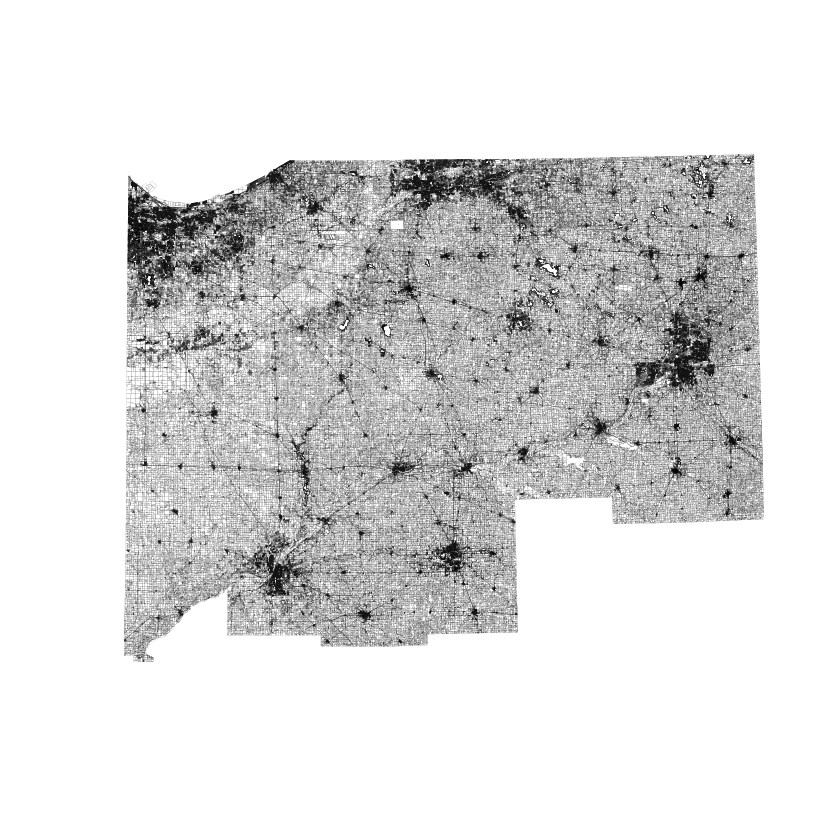

In [5]:
plot(combined_data$geometry, lwd = 0.05)

# **Batched Runs of State Quarters** #

In [ ]:
# NORTH TO SOUTH SORTED COUNTY LIST

    # QUARTER 1
    'LAKE', 'PORTER', 'LAPORTE', 'ST JOSEPH', 'ELKHART', 'LAGRANGE', 'STEUBEN', 'NEWTON', 'JASPER', 'STARKE', 'MARSHALL', 'KOSCIUSKO', 'NOBLE', 'DEKALB', 'PULASKI', 'FULTON', 'WHITLEY', 'ALLEN'
    
    # QUARTER 2
    'BENTON', 'WHITE', 'CASS', 'MIAMI', 'WABASH', 'HUNTINGTON', 'WELLS', 'ADAMS', 'WARREN', 'TIPPECANOE', 'CARROLL', 'HOWARD', 'GRANT', 'CLINTON', 'TIPTON', 'BLACKFORD', 'JAY', 'FOUNTAIN', 'MONTGOMERY', 'BOONE', 'HAMILTON', 'MADISON', 'DELAWARE', 'RANDOLPH'
    
    # QUARTER 3
    'VERMILLION', 'PARKE', 'PUTNAM', 'HENDRICKS', 'MARION', 'HANCOCK', 'HENRY', 'WAYNE', 'VIGO', 'CLAY', 'OWEN', 'MORGAN', 'JOHNSON', 'SHELBY', 'RUSH', 'FAYETTE', 'UNION', 'SULLIVAN', 'GREENE', 'MONROE', 'BROWN', 'BARTHOLOMEW', 'DECATUR', 'FRANKLIN'
    
    # QUARTER 4
    'RIPLEY', 'DEARBORN', 'KNOX', 'DAVIESS', 'MARTIN', 'LAWRENCE', 'JACKSON', 'JENNINGS', 'OHIO', 'GIBSON', 'PIKE', 'DUBOIS', 'ORANGE', 'WASHINGTON', 'SCOTT', 'JEFFERSON', 'SWITZERLAND', 'POSEY', 'VANDERBURGH', 'WARRICK', 'SPENCER', 'CRAWFORD', 'CLARK', 'PERRY', 'HARRISON', 'FLOYD'




In [12]:
# QUARTER 1
combined_data <- load_and_bind_counties(c('LAKE', 'PORTER', 'LAPORTE', 'ST JOSEPH', 'ELKHART', 'LAGRANGE', 'STEUBEN', 'NEWTON', 'JASPER', 'STARKE', 'MARSHALL', 'KOSCIUSKO', 'NOBLE', 'DEKALB', 'PULASKI', 'FULTON', 'WHITLEY', 'ALLEN'))

Reading layer `LAKE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/LAKE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 242628 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 455824.9 ymin: 4556861 xmax: 481682.9 ymax: 4617722
Projected CRS: NAD83 / UTM zone 16N


Shapefile for LAKE has been loaded.



Reading layer `PORTER' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/PORTER.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 81874 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 481457.7 ymin: 4563183 xmax: 505893.6 ymax: 4617707
Projected CRS: NAD83 / UTM zone 16N


Shapefile for PORTER has been loaded.



Reading layer `LAPORTE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/LAPORTE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 64572 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 505601.1 ymin: 4565077 xmax: 542831.3 ymax: 4623200
Projected CRS: NAD83 / UTM zone 16N


Shapefile for LAPORTE has been loaded.



Reading layer `ST JOSEPH' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/ST JOSEPH.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 119957 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 539411.8 ymin: 4586919 xmax: 578526.7 ymax: 4623614
Projected CRS: NAD83 / UTM zone 16N


Shapefile for ST JOSEPH has been loaded.



Reading layer `ELKHART' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/ELKHART.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 88148 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 577936.5 ymin: 4587530 xmax: 612493.1 ymax: 4623889
Projected CRS: NAD83 / UTM zone 16N


Shapefile for ELKHART has been loaded.



Reading layer `LAGRANGE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/LAGRANGE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 27801 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 611400.2 ymin: 4597730 xmax: 650670.5 ymax: 4624661
Projected CRS: NAD83 / UTM zone 16N


Shapefile for LAGRANGE has been loaded.



Reading layer `STEUBEN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/STEUBEN.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 39376 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 649919 ymin: 4598785 xmax: 683146.6 ymax: 4625472
Projected CRS: NAD83 / UTM zone 16N


Shapefile for STEUBEN has been loaded.



Reading layer `NEWTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/NEWTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 11627 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 455582.7 ymin: 4509551 xmax: 477432.9 ymax: 4563064
Projected CRS: NAD83 / UTM zone 16N


Shapefile for NEWTON has been loaded.



Reading layer `JASPER' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/JASPER.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 21404 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 476718 ymin: 4509515 xmax: 505896.8 ymax: 4570544
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JASPER has been loaded.



Reading layer `STARKE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/STARKE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 19867 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 505858.9 ymin: 4557825 xmax: 544708.7 ymax: 4586955
Projected CRS: NAD83 / UTM zone 16N


Shapefile for STARKE has been loaded.



Reading layer `MARSHALL' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/MARSHALL.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 30270 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 544522.3 ymin: 4557925 xmax: 579334.7 ymax: 4592361
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MARSHALL has been loaded.



Reading layer `KOSCIUSKO' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/KOSCIUSKO.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 52431 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 577383.8 ymin: 4543869 xmax: 613024.5 ymax: 4588147
Projected CRS: NAD83 / UTM zone 16N


Shapefile for KOSCIUSKO has been loaded.



Reading layer `NOBLE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/NOBLE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 27268 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 612239.1 ymin: 4569323 xmax: 651420.4 ymax: 4598785
Projected CRS: NAD83 / UTM zone 16N


Shapefile for NOBLE has been loaded.



Reading layer `DEKALB' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/DEKALB.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 33959 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 650670.3 ymin: 4569663 xmax: 683970.5 ymax: 4599957
Projected CRS: NAD83 / UTM zone 16N


Shapefile for DEKALB has been loaded.



Reading layer `PULASKI' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/PULASKI.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18098 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 505812.5 ymin: 4528870 xmax: 544781.9 ymax: 4558024
Projected CRS: NAD83 / UTM zone 16N


Shapefile for PULASKI has been loaded.



Reading layer `FULTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/FULTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 16997 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 544709 ymin: 4528858 xmax: 588697.8 ymax: 4558356
Projected CRS: NAD83 / UTM zone 16N


Shapefile for FULTON has been loaded.



Reading layer `WHITLEY' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/WHITLEY.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 20304 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 610156.1 ymin: 4539803 xmax: 641766.6 ymax: 4572565
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WHITLEY has been loaded.



Reading layer `ALLEN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/ALLEN.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."


Simple feature collection with 162482 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 639377.3 ymin: 4530885 xmax: 685001.8 ymax: 4571161
Projected CRS: NAD83 / UTM zone 16N


Shapefile for ALLEN has been loaded.

All selected shapefiles have been successfully combined into combined_data.



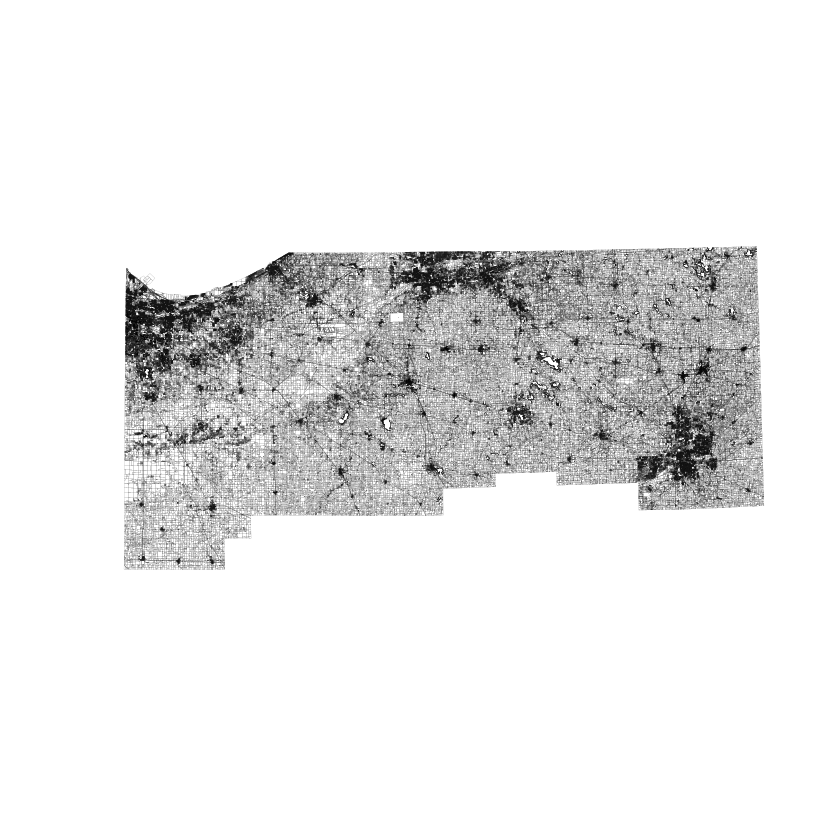

In [13]:
plot(combined_data$geometry, lwd = 0.05,)

In [5]:
# QUARTER 2
combined_data <- load_and_bind_counties(c('BENTON', 'WHITE', 'CASS', 'MIAMI', 'WABASH', 'HUNTINGTON', 'WELLS', 'ADAMS', 'WARREN', 'TIPPECANOE', 'CARROLL', 'HOWARD', 'GRANT', 'CLINTON', 'TIPTON', 'BLACKFORD', 'JAY', 'FOUNTAIN', 'MONTGOMERY', 'BOONE', 'HAMILTON', 'MADISON', 'DELAWARE', 'RANDOLPH'))

Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/BENTON/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 7821 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 455364.6 ymin: 4480561 xmax: 492107.2 ymax: 4509683
Projected CRS: NAD83 / UTM zone 16N


Shapefile for BENTON has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/WHITE/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 23111 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 491577.5 ymin: 4490051 xmax: 535383.2 ymax: 4529063
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WHITE has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/CASS/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 25468 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 535247.7 ymin: 4490253 xmax: 570680.3 ymax: 4529035
Projected CRS: NAD83 / UTM zone 16N


Shapefile for CASS has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/MIAMI/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 23488 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 569927.8 ymin: 4490544 xmax: 596195.3 ymax: 4539202
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MIAMI has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/WABASH/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 19444 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 588608 ymin: 4500554 xmax: 615096.9 ymax: 4544751
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WABASH has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/HUNTINGTON/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 22917 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 614053.8 ymin: 4501142 xmax: 640789.6 ymax: 4540674
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HUNTINGTON has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/WELLS/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18000 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 631119.3 ymin: 4491842 xmax: 663511 ymax: 4531791
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WELLS has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/ADAMS/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 20117 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 662195 ymin: 4492642 xmax: 686014.2 ymax: 4532485
Projected CRS: NAD83 / UTM zone 16N


Shapefile for ADAMS has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/WARREN/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 10637 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 454746.7 ymin: 4441995 xmax: 492180.9 ymax: 4480817
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WARREN has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/TIPPECANOE/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 80789 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 491946.1 ymin: 4451586 xmax: 525914.3 ymax: 4490246
Projected CRS: NAD83 / UTM zone 16N


Shapefile for TIPPECANOE has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/CARROLL/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 21424 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 519083.8 ymin: 4475722 xmax: 552976 ymax: 4509652
Projected CRS: NAD83 / UTM zone 16N


Shapefile for CARROLL has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/HOWARD/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 43856 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 552933.2 ymin: 4469487 xmax: 596550 ymax: 4491148
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HOWARD has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/GRANT/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 37796 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 595997.1 ymin: 4470375 xmax: 632049.7 ymax: 4501470
Projected CRS: NAD83 / UTM zone 16N


Shapefile for GRANT has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/CLINTON/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 26057 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 525898.5 ymin: 4447497 xmax: 564501.4 ymax: 4475907
Projected CRS: NAD83 / UTM zone 16N


Shapefile for CLINTON has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/TIPTON/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 12630 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 564252.2 ymin: 4451987 xmax: 596889.1 ymax: 4473541
Projected CRS: NAD83 / UTM zone 16N


Shapefile for TIPTON has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/BLACKFORD/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 8782 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 631463.6 ymin: 4470957 xmax: 652502.8 ymax: 4492275
Projected CRS: NAD83 / UTM zone 16N


Shapefile for BLACKFORD has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/JAY/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 16517 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 651075.5 ymin: 4463312 xmax: 686632.7 ymax: 4493593
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JAY has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/FOUNTAIN/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 15158 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 462443.2 ymin: 4422541 xmax: 492285.6 ymax: 4468370
Projected CRS: NAD83 / UTM zone 16N


Shapefile for FOUNTAIN has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/MONTGOMERY/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 23518 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 492128.1 ymin: 4412794 xmax: 526075 ymax: 4451623
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MONTGOMERY has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/BOONE/Parcels.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."


Simple feature collection with 42090 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 525901 ymin: 4419230 xmax: 564872.1 ymax: 4448081
Projected CRS: NAD83 / UTM zone 16N


Shapefile for BOONE has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/HAMILTON/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 145137 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 564441.1 ymin: 4419833 xmax: 597207 ymax: 4452670
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HAMILTON has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/MADISON/Parcels.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: Geometry of polygon of fid 84726 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, 

Simple feature collection with 85734 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 596576.9 ymin: 4422107 xmax: 621636.2 ymax: 4470864
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MADISON has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/DELAWARE/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 59981 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 620643.6 ymin: 4437303 xmax: 652257 ymax: 4471370
Projected CRS: NAD83 / UTM zone 16N


Shapefile for DELAWARE has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/RANDOLPH/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18603 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 651354.7 ymin: 4429778 xmax: 686866.7 ymax: 4464583
Projected CRS: NAD83 / UTM zone 16N


Shapefile for RANDOLPH has been loaded.

All selected shapefiles have been successfully combined into combined_data.



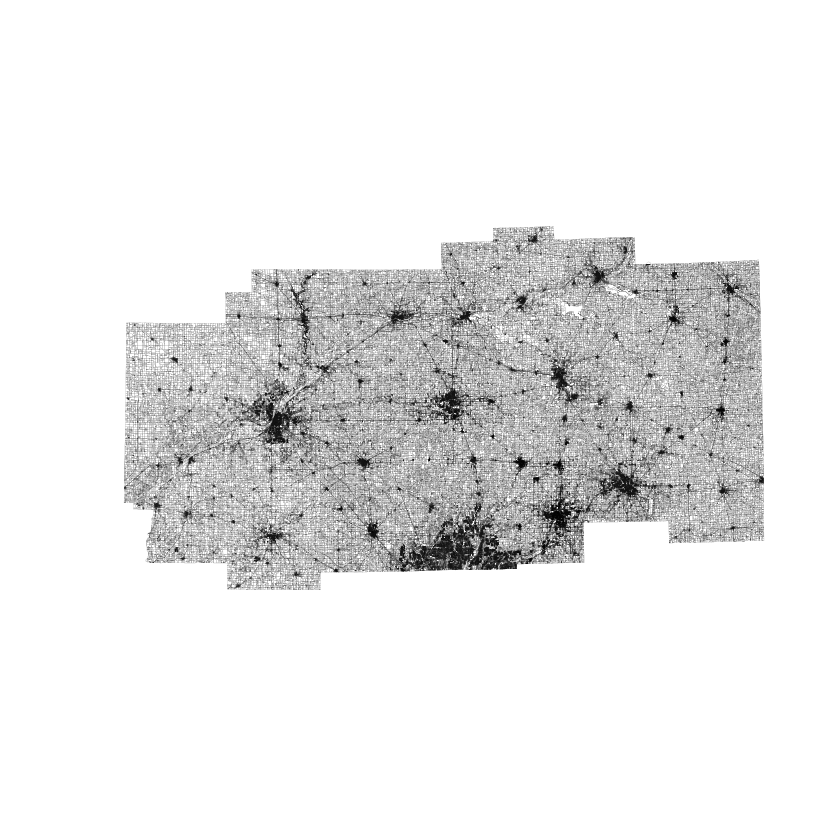

In [6]:
plot(combined_data$geometry, lwd = 0.05)

In [9]:
# QUARTER 3
combined_data <- load_and_bind_counties(c('VERMILLION', 'PARKE', 'PUTNAM', 'HENDRICKS', 'MARION', 'HANCOCK', 'HENRY', 'WAYNE', 'VIGO', 'CLAY', 'OWEN', 'MORGAN', 'JOHNSON', 'SHELBY', 'RUSH', 'FAYETTE', 'UNION', 'SULLIVAN', 'GREENE', 'MONROE', 'BROWN', 'BARTHOLOMEW', 'DECATUR', 'FRANKLIN'))

Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/VERMILLION/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 12812 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 454304.4 ymin: 4384289 xmax: 469710.4 ymax: 4444349
Projected CRS: NAD83 / UTM zone 16N


Shapefile for VERMILLION has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/PARKE/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 20899 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 462918.5 ymin: 4383901 xmax: 499181.6 ymax: 4422570
Projected CRS: NAD83 / UTM zone 16N


Shapefile for PARKE has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/PUTNAM/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 25879 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 498740.4 ymin: 4368988 xmax: 530735 ymax: 4412965
Projected CRS: NAD83 / UTM zone 16N


Shapefile for PUTNAM has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/HENDRICKS/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 83616 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 526037.6 ymin: 4383532 xmax: 557806.2 ymax: 4419561
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HENDRICKS has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/MARION/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 344419 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 557479.3 ymin: 4387155 xmax: 590810.5 ymax: 4420251
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MARION has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/HANCOCK/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 48711 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 589460.4 ymin: 4394675 xmax: 621915.1 ymax: 4422700
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HANCOCK has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/HENRY/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 28290 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 620009 ymin: 4404990 xmax: 653851.4 ymax: 4437818
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HENRY has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/WAYNE/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 35457 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 652163.4 ymin: 4397759 xmax: 687314.7 ymax: 4430616
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WAYNE has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/VIGO/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 59891 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 446486.6 ymin: 4345556 xmax: 482907.9 ymax: 4384334
Projected CRS: NAD83 / UTM zone 16N


Shapefile for VIGO has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/CLAY/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 23322 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 479208.3 ymin: 4335442 xmax: 505170.5 ymax: 4384168
Projected CRS: NAD83 / UTM zone 16N


Shapefile for CLAY has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/OWEN/Parcels.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() recei

Simple feature collection with 17636 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 495262.4 ymin: 4335204 xmax: 531805.1 ymax: 4369260
Projected CRS: NAD83 / UTM zone 16N


Shapefile for OWEN has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/MORGAN/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 43261 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 526862.4 ymin: 4354449 xmax: 564498.5 ymax: 4387380
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MORGAN has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/JOHNSON/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 69389 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 564324.8 ymin: 4354972 xmax: 590301.4 ymax: 4388147
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JOHNSON has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/SHELBY/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 30245 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 589874.5 ymin: 4355849 xmax: 617990.4 ymax: 4395184
Projected CRS: NAD83 / UTM zone 16N


Shapefile for SHELBY has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/RUSH/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 13165 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 617037 ymin: 4367959 xmax: 646472.8 ymax: 4405560
Projected CRS: NAD83 / UTM zone 16N


Shapefile for RUSH has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/FAYETTE/Parcels.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() recei

Simple feature collection with 14085 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 645429 ymin: 4376474 xmax: 668787.9 ymax: 4405851
Projected CRS: NAD83 / UTM zone 16N


Shapefile for FAYETTE has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/UNION/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 6558 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 668451.1 ymin: 4376866 xmax: 687779.6 ymax: 4399683
Projected CRS: NAD83 / UTM zone 16N


Shapefile for UNION has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/SULLIVAN/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18484 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 443136.6 ymin: 4305890 xmax: 479262.9 ymax: 4345736
Projected CRS: NAD83 / UTM zone 16N


Shapefile for SULLIVAN has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/GREENE/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 25945 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 479107.7 ymin: 4305949 xmax: 527522.3 ymax: 4335874
Projected CRS: NAD83 / UTM zone 16N


Shapefile for GREENE has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/MONROE/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 66020 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 527086.4 ymin: 4315946 xmax: 559086 ymax: 4356249
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MONROE has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/BROWN/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 16158 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 553299.7 ymin: 4322344 xmax: 579648.3 ymax: 4355442
Projected CRS: NAD83 / UTM zone 16N


Shapefile for BROWN has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/BARTHOLOMEW/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 38359 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 579281.5 ymin: 4321155 xmax: 613505.7 ymax: 4356448
Projected CRS: NAD83 / UTM zone 16N


Shapefile for BARTHOLOMEW has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/DECATUR/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 17876 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 613305.2 ymin: 4332106 xmax: 646960.5 ymax: 4368474
Projected CRS: NAD83 / UTM zone 16N


Shapefile for DECATUR has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/FRANKLIN/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 17910 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 646232.6 ymin: 4347925 xmax: 688017.7 ymax: 4377085
Projected CRS: NAD83 / UTM zone 16N


Shapefile for FRANKLIN has been loaded.

All selected shapefiles have been successfully combined into combined_data.



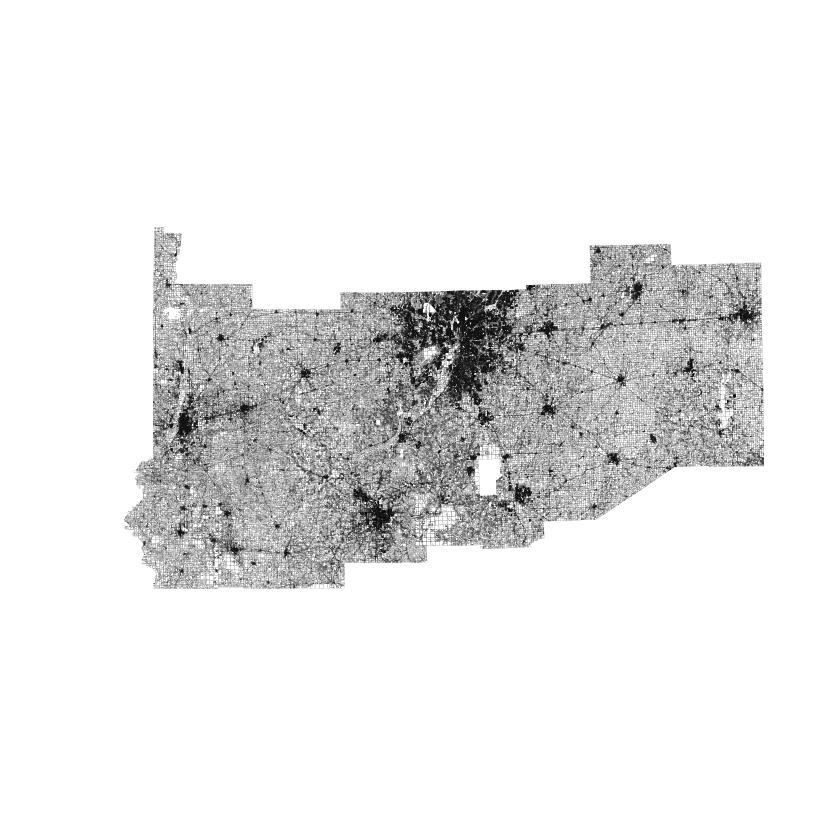

In [10]:
plot(combined_data$geometry, lwd = 0.05)

In [11]:
# QUARTER 4
combined_data <- load_and_bind_counties(c('RIPLEY', 'DEARBORN', 'KNOX', 'DAVIESS', 'MARTIN', 'LAWRENCE', 'JACKSON', 'JENNINGS', 'OHIO', 'GIBSON', 'PIKE', 'DUBOIS', 'ORANGE', 'WASHINGTON', 'SCOTT', 'JEFFERSON', 'SWITZERLAND', 'POSEY', 'VANDERBURGH', 'WARRICK', 'SPENCER', 'CRAWFORD', 'CLARK', 'PERRY', 'HARRISON', 'FLOYD'))

Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/RIPLEY/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18478 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 634668.8 ymin: 4308333 xmax: 666816.6 ymax: 4352969
Projected CRS: NAD83 / UTM zone 16N


Shapefile for RIPLEY has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/DEARBORN/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 32287 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 661833 ymin: 4311380 xmax: 688502.2 ymax: 4352915
Projected CRS: NAD83 / UTM zone 16N


Shapefile for DEARBORN has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/KNOX/Parcels.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: Geometry of polygon of fid 3808 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon."


Simple feature collection with 29933 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 434076.1 ymin: 4252185 xmax: 492136.5 ymax: 4306580
Projected CRS: NAD83 / UTM zone 16N


Shapefile for KNOX has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/DAVIESS/Parcels.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() recei

Simple feature collection with 22117 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 475699.1 ymin: 4260233 xmax: 508324.2 ymax: 4306148
Projected CRS: NAD83 / UTM zone 16N


Shapefile for DAVIESS has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/MARTIN/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 10221 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 506611.4 ymin: 4260747 xmax: 527686.5 ymax: 4306215
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MARTIN has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/LAWRENCE/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 31967 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 527474.2 ymin: 4282054 xmax: 562994.8 ymax: 4316025
Projected CRS: NAD83 / UTM zone 16N


Shapefile for LAWRENCE has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/JACKSON/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 26778 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 559016.4 ymin: 4286838 xmax: 604593 ymax: 4325301
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JACKSON has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/JENNINGS/Parcels.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."


Simple feature collection with 20745 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 603746.9 ymin: 4296046 xmax: 634825.9 ymax: 4339695
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JENNINGS has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/OHIO/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 3456 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 661265.8 ymin: 4307677 xmax: 687810.3 ymax: 4322307
Projected CRS: NAD83 / UTM zone 16N


Shapefile for OHIO has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/GIBSON/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 21782 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 413541.5 ymin: 4224268 xmax: 472403.7 ymax: 4265049
Projected CRS: NAD83 / UTM zone 16N


Shapefile for GIBSON has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/PIKE/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 17475 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 459601.1 ymin: 4231469 xmax: 493711.4 ymax: 4267074
Projected CRS: NAD83 / UTM zone 16N


Shapefile for PIKE has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/DUBOIS/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 34895 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 493598.9 ymin: 4228332 xmax: 528053.8 ymax: 4264269
Projected CRS: NAD83 / UTM zone 16N


Shapefile for DUBOIS has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/ORANGE/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 27025 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 527563.7 ymin: 4249666 xmax: 560415 ymax: 4282413
Projected CRS: NAD83 / UTM zone 16N


Shapefile for ORANGE has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/WASHINGTON/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 19288 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 559974 ymin: 4252648 xmax: 600431 ymax: 4293167
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WASHINGTON has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/SCOTT/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 15277 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 596615 ymin: 4268721 xmax: 624496.1 ymax: 4298893
Projected CRS: NAD83 / UTM zone 16N


Shapefile for SCOTT has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/JEFFERSON/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 20209 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 614242.7 ymin: 4271923 xmax: 656405.2 ymax: 4308753
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JEFFERSON has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/SWITZERLAND/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 8279 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 655779.7 ymin: 4283817 xmax: 692092.3 ymax: 4310608
Projected CRS: NAD83 / UTM zone 16N


Shapefile for SWITZERLAND has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/POSEY/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 20425 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 403530.9 ymin: 4180997 xmax: 439750 ymax: 4231830
Projected CRS: NAD83 / UTM zone 16N


Shapefile for POSEY has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/VANDERBURGH/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 79500 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 438418 ymin: 4186754 xmax: 460503.2 ymax: 4224721
Projected CRS: NAD83 / UTM zone 16N


Shapefile for VANDERBURGH has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/WARRICK/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 40495 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 458465.3 ymin: 4192483 xmax: 498476.8 ymax: 4233171
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WARRICK has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/SPENCER/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 23089 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 476363.1 ymin: 4181681 xmax: 520612.2 ymax: 4228595
Projected CRS: NAD83 / UTM zone 16N


Shapefile for SPENCER has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/CRAWFORD/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 13134 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 527814.3 ymin: 4217696 xmax: 565844.1 ymax: 4252991
Projected CRS: NAD83 / UTM zone 16N


Shapefile for CRAWFORD has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/CLARK/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 62199 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 587708.9 ymin: 4236202 xmax: 638108.8 ymax: 4274202
Projected CRS: NAD83 / UTM zone 16N


Shapefile for CLARK has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/PERRY/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 17905 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 516380.9 ymin: 4188321 xmax: 549922.4 ymax: 4235459
Projected CRS: NAD83 / UTM zone 16N


Shapefile for PERRY has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/HARRISON/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 27682 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 558812.3 ymin: 4201669 xmax: 596401.2 ymax: 4252981
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HARRISON has been loaded.



Reading layer `Parcels' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/allcountiesshpfiles/FLOYD/Parcels.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 45902 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 584434.6 ymin: 4226503 xmax: 608253.8 ymax: 4252768
Projected CRS: NAD83 / UTM zone 16N


Shapefile for FLOYD has been loaded.

All selected shapefiles have been successfully combined into combined_data.



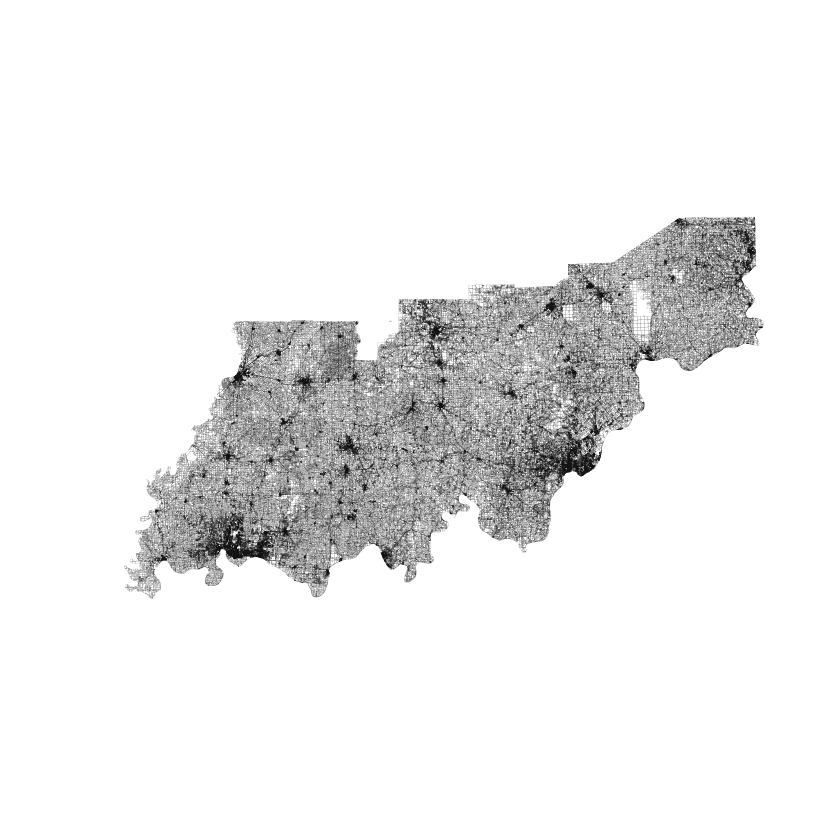

In [12]:
plot(combined_data$geometry, lwd = 0.05)

In [5]:
combined_data <- load_and_bind_counties("ALL")

Reading layer `ADAMS' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/ADAMS.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 20117 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 662195 ymin: 4492642 xmax: 686014.2 ymax: 4532485
Projected CRS: NAD83 / UTM zone 16N


Shapefile for ADAMS has been loaded.



Reading layer `ALLEN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/ALLEN.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."


Simple feature collection with 162482 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 639377.3 ymin: 4530885 xmax: 685001.8 ymax: 4571161
Projected CRS: NAD83 / UTM zone 16N


Shapefile for ALLEN has been loaded.



Reading layer `BARTHOLOMEW' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/BARTHOLOMEW.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 38359 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 579281.5 ymin: 4321155 xmax: 613505.7 ymax: 4356448
Projected CRS: NAD83 / UTM zone 16N


Shapefile for BARTHOLOMEW has been loaded.



Reading layer `BENTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/BENTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 7821 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 455364.6 ymin: 4480561 xmax: 492107.2 ymax: 4509683
Projected CRS: NAD83 / UTM zone 16N


Shapefile for BENTON has been loaded.



Reading layer `BLACKFORD' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/BLACKFORD.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 8782 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 631463.6 ymin: 4470957 xmax: 652502.8 ymax: 4492275
Projected CRS: NAD83 / UTM zone 16N


Shapefile for BLACKFORD has been loaded.



Reading layer `BOONE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/BOONE.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."


Simple feature collection with 42090 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 525901 ymin: 4419230 xmax: 564872.1 ymax: 4448081
Projected CRS: NAD83 / UTM zone 16N


Shapefile for BOONE has been loaded.



Reading layer `BROWN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/BROWN.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 16158 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 553299.7 ymin: 4322344 xmax: 579648.3 ymax: 4355442
Projected CRS: NAD83 / UTM zone 16N


Shapefile for BROWN has been loaded.



Reading layer `CARROLL' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/CARROLL.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 21424 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 519083.8 ymin: 4475722 xmax: 552976 ymax: 4509652
Projected CRS: NAD83 / UTM zone 16N


Shapefile for CARROLL has been loaded.



Reading layer `CASS' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/CASS.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 25468 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 535247.7 ymin: 4490253 xmax: 570680.3 ymax: 4529035
Projected CRS: NAD83 / UTM zone 16N


Shapefile for CASS has been loaded.



Reading layer `CLARK' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/CLARK.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 62199 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 587708.9 ymin: 4236202 xmax: 638108.8 ymax: 4274202
Projected CRS: NAD83 / UTM zone 16N


Shapefile for CLARK has been loaded.



Reading layer `CLAY' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/CLAY.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 23322 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 479208.3 ymin: 4335442 xmax: 505170.5 ymax: 4384168
Projected CRS: NAD83 / UTM zone 16N


Shapefile for CLAY has been loaded.



Reading layer `CLINTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/CLINTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 26057 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 525898.5 ymin: 4447497 xmax: 564501.4 ymax: 4475907
Projected CRS: NAD83 / UTM zone 16N


Shapefile for CLINTON has been loaded.



Reading layer `CRAWFORD' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/CRAWFORD.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 13134 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 527814.3 ymin: 4217696 xmax: 565844.1 ymax: 4252991
Projected CRS: NAD83 / UTM zone 16N


Shapefile for CRAWFORD has been loaded.



Reading layer `DAVIESS' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/DAVIESS.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() recei

Simple feature collection with 22117 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 475699.1 ymin: 4260233 xmax: 508324.2 ymax: 4306148
Projected CRS: NAD83 / UTM zone 16N


Shapefile for DAVIESS has been loaded.



Reading layer `DEARBORN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/DEARBORN.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 32287 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 661833 ymin: 4311380 xmax: 688502.2 ymax: 4352915
Projected CRS: NAD83 / UTM zone 16N


Shapefile for DEARBORN has been loaded.



Reading layer `DECATUR' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/DECATUR.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 17876 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 613305.2 ymin: 4332106 xmax: 646960.5 ymax: 4368474
Projected CRS: NAD83 / UTM zone 16N


Shapefile for DECATUR has been loaded.



Reading layer `DEKALB' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/DEKALB.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 33959 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 650670.3 ymin: 4569663 xmax: 683970.5 ymax: 4599957
Projected CRS: NAD83 / UTM zone 16N


Shapefile for DEKALB has been loaded.



Reading layer `DELAWARE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/DELAWARE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 59981 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 620643.6 ymin: 4437303 xmax: 652257 ymax: 4471370
Projected CRS: NAD83 / UTM zone 16N


Shapefile for DELAWARE has been loaded.



Reading layer `DUBOIS' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/DUBOIS.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 34895 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 493598.9 ymin: 4228332 xmax: 528053.8 ymax: 4264269
Projected CRS: NAD83 / UTM zone 16N


Shapefile for DUBOIS has been loaded.



Reading layer `ELKHART' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/ELKHART.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 88148 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 577936.5 ymin: 4587530 xmax: 612493.1 ymax: 4623889
Projected CRS: NAD83 / UTM zone 16N


Shapefile for ELKHART has been loaded.



Reading layer `FAYETTE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/FAYETTE.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() recei

Simple feature collection with 14085 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 645429 ymin: 4376474 xmax: 668787.9 ymax: 4405851
Projected CRS: NAD83 / UTM zone 16N


Shapefile for FAYETTE has been loaded.



Reading layer `FLOYD' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/FLOYD.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 45902 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 584434.6 ymin: 4226503 xmax: 608253.8 ymax: 4252768
Projected CRS: NAD83 / UTM zone 16N


Shapefile for FLOYD has been loaded.



Reading layer `FOUNTAIN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/FOUNTAIN.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 15158 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 462443.2 ymin: 4422541 xmax: 492285.6 ymax: 4468370
Projected CRS: NAD83 / UTM zone 16N


Shapefile for FOUNTAIN has been loaded.



Reading layer `FRANKLIN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/FRANKLIN.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 17910 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 646232.6 ymin: 4347925 xmax: 688017.7 ymax: 4377085
Projected CRS: NAD83 / UTM zone 16N


Shapefile for FRANKLIN has been loaded.



Reading layer `FULTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/FULTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 16997 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 544709 ymin: 4528858 xmax: 588697.8 ymax: 4558356
Projected CRS: NAD83 / UTM zone 16N


Shapefile for FULTON has been loaded.



Reading layer `GIBSON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/GIBSON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 21782 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 413541.5 ymin: 4224268 xmax: 472403.7 ymax: 4265049
Projected CRS: NAD83 / UTM zone 16N


Shapefile for GIBSON has been loaded.



Reading layer `GRANT' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/GRANT.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 37796 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 595997.1 ymin: 4470375 xmax: 632049.7 ymax: 4501470
Projected CRS: NAD83 / UTM zone 16N


Shapefile for GRANT has been loaded.



Reading layer `GREENE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/GREENE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 25945 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 479107.7 ymin: 4305949 xmax: 527522.3 ymax: 4335874
Projected CRS: NAD83 / UTM zone 16N


Shapefile for GREENE has been loaded.



Reading layer `HAMILTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/HAMILTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 145137 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 564441.1 ymin: 4419833 xmax: 597207 ymax: 4452670
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HAMILTON has been loaded.



Reading layer `HANCOCK' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/HANCOCK.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 48711 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 589460.4 ymin: 4394675 xmax: 621915.1 ymax: 4422700
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HANCOCK has been loaded.



Reading layer `HARRISON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/HARRISON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 27682 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 558812.3 ymin: 4201669 xmax: 596401.2 ymax: 4252981
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HARRISON has been loaded.



Reading layer `HENDRICKS' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/HENDRICKS.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 83616 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 526037.6 ymin: 4383532 xmax: 557806.2 ymax: 4419561
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HENDRICKS has been loaded.



Reading layer `HENRY' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/HENRY.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 28290 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 620009 ymin: 4404990 xmax: 653851.4 ymax: 4437818
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HENRY has been loaded.



Reading layer `HOWARD' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/HOWARD.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 43856 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 552933.2 ymin: 4469487 xmax: 596550 ymax: 4491148
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HOWARD has been loaded.



Reading layer `HUNTINGTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/HUNTINGTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 22917 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 614053.8 ymin: 4501142 xmax: 640789.6 ymax: 4540674
Projected CRS: NAD83 / UTM zone 16N


Shapefile for HUNTINGTON has been loaded.



Reading layer `JACKSON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/JACKSON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 26778 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 559016.4 ymin: 4286838 xmax: 604593 ymax: 4325301
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JACKSON has been loaded.



Reading layer `JASPER' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/JASPER.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 21404 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 476718 ymin: 4509515 xmax: 505896.8 ymax: 4570544
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JASPER has been loaded.



Reading layer `JAY' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/JAY.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 16517 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 651075.5 ymin: 4463312 xmax: 686632.7 ymax: 4493593
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JAY has been loaded.



Reading layer `JEFFERSON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/JEFFERSON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 20209 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 614242.7 ymin: 4271923 xmax: 656405.2 ymax: 4308753
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JEFFERSON has been loaded.



Reading layer `JENNINGS' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/JENNINGS.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."


Simple feature collection with 20745 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 603746.9 ymin: 4296046 xmax: 634825.9 ymax: 4339695
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JENNINGS has been loaded.



Reading layer `JOHNSON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/JOHNSON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 69389 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 564324.8 ymin: 4354972 xmax: 590301.4 ymax: 4388147
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JOHNSON has been loaded.



Reading layer `KNOX' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/KNOX.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: Geometry of polygon of fid 3808 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon."


Simple feature collection with 29933 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 434076.1 ymin: 4252185 xmax: 492136.5 ymax: 4306580
Projected CRS: NAD83 / UTM zone 16N


Shapefile for KNOX has been loaded.



Reading layer `KOSCIUSKO' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/KOSCIUSKO.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 52431 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 577383.8 ymin: 4543869 xmax: 613024.5 ymax: 4588147
Projected CRS: NAD83 / UTM zone 16N


Shapefile for KOSCIUSKO has been loaded.



Reading layer `LAGRANGE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/LAGRANGE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 27801 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 611400.2 ymin: 4597730 xmax: 650670.5 ymax: 4624661
Projected CRS: NAD83 / UTM zone 16N


Shapefile for LAGRANGE has been loaded.



Reading layer `LAKE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/LAKE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 242628 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 455824.9 ymin: 4556861 xmax: 481682.9 ymax: 4617722
Projected CRS: NAD83 / UTM zone 16N


Shapefile for LAKE has been loaded.



Reading layer `LAPORTE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/LAPORTE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 64572 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 505601.1 ymin: 4565077 xmax: 542831.3 ymax: 4623200
Projected CRS: NAD83 / UTM zone 16N


Shapefile for LAPORTE has been loaded.



Reading layer `LAWRENCE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/LAWRENCE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 31967 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 527474.2 ymin: 4282054 xmax: 562994.8 ymax: 4316025
Projected CRS: NAD83 / UTM zone 16N


Shapefile for LAWRENCE has been loaded.



Reading layer `MADISON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/MADISON.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: Geometry of polygon of fid 84726 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, 

Simple feature collection with 85734 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 596576.9 ymin: 4422107 xmax: 621636.2 ymax: 4470864
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MADISON has been loaded.



Reading layer `MARION' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/MARION.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 344419 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 557479.3 ymin: 4387155 xmax: 590810.5 ymax: 4420251
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MARION has been loaded.



Reading layer `MARSHALL' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/MARSHALL.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 30270 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 544522.3 ymin: 4557925 xmax: 579334.7 ymax: 4592361
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MARSHALL has been loaded.



Reading layer `MARTIN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/MARTIN.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 10221 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 506611.4 ymin: 4260747 xmax: 527686.5 ymax: 4306215
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MARTIN has been loaded.



Reading layer `MIAMI' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/MIAMI.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 23488 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 569927.8 ymin: 4490544 xmax: 596195.3 ymax: 4539202
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MIAMI has been loaded.



Reading layer `MONROE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/MONROE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 66020 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 527086.4 ymin: 4315946 xmax: 559086 ymax: 4356249
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MONROE has been loaded.



Reading layer `MONTGOMERY' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/MONTGOMERY.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 23518 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 492128.1 ymin: 4412794 xmax: 526075 ymax: 4451623
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MONTGOMERY has been loaded.



Reading layer `MORGAN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/MORGAN.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 43261 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 526862.4 ymin: 4354449 xmax: 564498.5 ymax: 4387380
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MORGAN has been loaded.



Reading layer `NEWTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/NEWTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 11627 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 455582.7 ymin: 4509551 xmax: 477432.9 ymax: 4563064
Projected CRS: NAD83 / UTM zone 16N


Shapefile for NEWTON has been loaded.



Reading layer `NOBLE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/NOBLE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 27268 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 612239.1 ymin: 4569323 xmax: 651420.4 ymax: 4598785
Projected CRS: NAD83 / UTM zone 16N


Shapefile for NOBLE has been loaded.



Reading layer `OHIO' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/OHIO.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 3456 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 661265.8 ymin: 4307677 xmax: 687810.3 ymax: 4322307
Projected CRS: NAD83 / UTM zone 16N


Shapefile for OHIO has been loaded.



Reading layer `ORANGE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/ORANGE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 27025 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 527563.7 ymin: 4249666 xmax: 560415 ymax: 4282413
Projected CRS: NAD83 / UTM zone 16N


Shapefile for ORANGE has been loaded.



Reading layer `OWEN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/OWEN.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() recei

Simple feature collection with 17636 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 495262.4 ymin: 4335204 xmax: 531805.1 ymax: 4369260
Projected CRS: NAD83 / UTM zone 16N


Shapefile for OWEN has been loaded.



Reading layer `PARKE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/PARKE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 20899 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 462918.5 ymin: 4383901 xmax: 499181.6 ymax: 4422570
Projected CRS: NAD83 / UTM zone 16N


Shapefile for PARKE has been loaded.



Reading layer `PERRY' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/PERRY.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 17905 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 516380.9 ymin: 4188321 xmax: 549922.4 ymax: 4235459
Projected CRS: NAD83 / UTM zone 16N


Shapefile for PERRY has been loaded.



Reading layer `PIKE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/PIKE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 17475 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 459601.1 ymin: 4231469 xmax: 493711.4 ymax: 4267074
Projected CRS: NAD83 / UTM zone 16N


Shapefile for PIKE has been loaded.



Reading layer `PORTER' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/PORTER.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 81874 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 481457.7 ymin: 4563183 xmax: 505893.6 ymax: 4617707
Projected CRS: NAD83 / UTM zone 16N


Shapefile for PORTER has been loaded.



Reading layer `POSEY' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/POSEY.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 20425 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 403530.9 ymin: 4180997 xmax: 439750 ymax: 4231830
Projected CRS: NAD83 / UTM zone 16N


Shapefile for POSEY has been loaded.



Reading layer `PULASKI' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/PULASKI.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18098 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 505812.5 ymin: 4528870 xmax: 544781.9 ymax: 4558024
Projected CRS: NAD83 / UTM zone 16N


Shapefile for PULASKI has been loaded.



Reading layer `PUTNAM' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/PUTNAM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 25879 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 498740.4 ymin: 4368988 xmax: 530735 ymax: 4412965
Projected CRS: NAD83 / UTM zone 16N


Shapefile for PUTNAM has been loaded.



Reading layer `RANDOLPH' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/RANDOLPH.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18603 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 651354.7 ymin: 4429778 xmax: 686866.7 ymax: 4464583
Projected CRS: NAD83 / UTM zone 16N


Shapefile for RANDOLPH has been loaded.



Reading layer `RIPLEY' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/RIPLEY.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18478 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 634668.8 ymin: 4308333 xmax: 666816.6 ymax: 4352969
Projected CRS: NAD83 / UTM zone 16N


Shapefile for RIPLEY has been loaded.



Reading layer `RUSH' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/RUSH.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 13165 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 617037 ymin: 4367959 xmax: 646472.8 ymax: 4405560
Projected CRS: NAD83 / UTM zone 16N


Shapefile for RUSH has been loaded.



Reading layer `SCOTT' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/SCOTT.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 15277 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 596615 ymin: 4268721 xmax: 624496.1 ymax: 4298893
Projected CRS: NAD83 / UTM zone 16N


Shapefile for SCOTT has been loaded.



Reading layer `SHELBY' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/SHELBY.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 30245 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 589874.5 ymin: 4355849 xmax: 617990.4 ymax: 4395184
Projected CRS: NAD83 / UTM zone 16N


Shapefile for SHELBY has been loaded.



Reading layer `SPENCER' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/SPENCER.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 23089 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 476363.1 ymin: 4181681 xmax: 520612.2 ymax: 4228595
Projected CRS: NAD83 / UTM zone 16N


Shapefile for SPENCER has been loaded.



Reading layer `ST JOSEPH' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/ST JOSEPH.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 119957 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 539411.8 ymin: 4586919 xmax: 578526.7 ymax: 4623614
Projected CRS: NAD83 / UTM zone 16N


Shapefile for ST JOSEPH has been loaded.



Reading layer `STARKE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/STARKE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 19867 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 505858.9 ymin: 4557825 xmax: 544708.7 ymax: 4586955
Projected CRS: NAD83 / UTM zone 16N


Shapefile for STARKE has been loaded.



Reading layer `STEUBEN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/STEUBEN.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 39376 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 649919 ymin: 4598785 xmax: 683146.6 ymax: 4625472
Projected CRS: NAD83 / UTM zone 16N


Shapefile for STEUBEN has been loaded.



Reading layer `SULLIVAN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/SULLIVAN.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18484 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 443136.6 ymin: 4305890 xmax: 479262.9 ymax: 4345736
Projected CRS: NAD83 / UTM zone 16N


Shapefile for SULLIVAN has been loaded.



Reading layer `SWITZERLAND' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/SWITZERLAND.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 8279 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 655779.7 ymin: 4283817 xmax: 692092.3 ymax: 4310608
Projected CRS: NAD83 / UTM zone 16N


Shapefile for SWITZERLAND has been loaded.



Reading layer `TIPPECANOE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/TIPPECANOE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 80789 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 491946.1 ymin: 4451586 xmax: 525914.3 ymax: 4490246
Projected CRS: NAD83 / UTM zone 16N


Shapefile for TIPPECANOE has been loaded.



Reading layer `TIPTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/TIPTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 12630 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 564252.2 ymin: 4451987 xmax: 596889.1 ymax: 4473541
Projected CRS: NAD83 / UTM zone 16N


Shapefile for TIPTON has been loaded.



Reading layer `UNION' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/UNION.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 6558 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 668451.1 ymin: 4376866 xmax: 687779.6 ymax: 4399683
Projected CRS: NAD83 / UTM zone 16N


Shapefile for UNION has been loaded.



Reading layer `VANDERBURGH' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/VANDERBURGH.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 79500 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 438418 ymin: 4186754 xmax: 460503.2 ymax: 4224721
Projected CRS: NAD83 / UTM zone 16N


Shapefile for VANDERBURGH has been loaded.



Reading layer `VERMILLION' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/VERMILLION.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 12812 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 454304.4 ymin: 4384289 xmax: 469710.4 ymax: 4444349
Projected CRS: NAD83 / UTM zone 16N


Shapefile for VERMILLION has been loaded.



Reading layer `VIGO' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/VIGO.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 59891 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 446486.6 ymin: 4345556 xmax: 482907.9 ymax: 4384334
Projected CRS: NAD83 / UTM zone 16N


Shapefile for VIGO has been loaded.



Reading layer `WABASH' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/WABASH.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 19444 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 588608 ymin: 4500554 xmax: 615096.9 ymax: 4544751
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WABASH has been loaded.



Reading layer `WARREN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/WARREN.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 10637 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 454746.7 ymin: 4441995 xmax: 492180.9 ymax: 4480817
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WARREN has been loaded.



Reading layer `WARRICK' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/WARRICK.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 40495 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 458465.3 ymin: 4192483 xmax: 498476.8 ymax: 4233171
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WARRICK has been loaded.



Reading layer `WASHINGTON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/WASHINGTON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 19288 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 559974 ymin: 4252648 xmax: 600431 ymax: 4293167
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WASHINGTON has been loaded.



Reading layer `WAYNE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/WAYNE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 35457 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 652163.4 ymin: 4397759 xmax: 687314.7 ymax: 4430616
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WAYNE has been loaded.



Reading layer `WELLS' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/WELLS.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18000 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 631119.3 ymin: 4491842 xmax: 663511 ymax: 4531791
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WELLS has been loaded.



Reading layer `WHITE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/WHITE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 23111 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 491577.5 ymin: 4490051 xmax: 535383.2 ymax: 4529063
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WHITE has been loaded.



Reading layer `WHITLEY' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/WHITLEY.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 20304 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 610156.1 ymin: 4539803 xmax: 641766.6 ymax: 4572565
Projected CRS: NAD83 / UTM zone 16N


Shapefile for WHITLEY has been loaded.

All selected shapefiles have been successfully combined into combined_data.



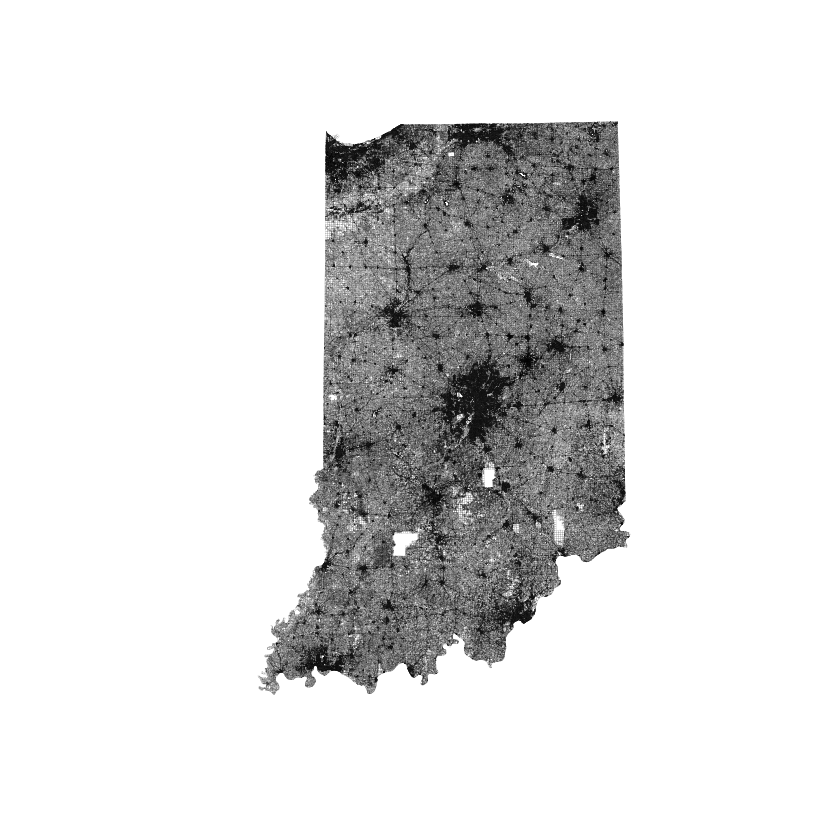

In [6]:
plot(combined_data$geometry, lwd = 0.05)

# **Special Large Land Parcels** #

In [13]:
combined_data <- load_and_bind_counties(c('MARTIN','GREENE'))

Reading layer `MARTIN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/MARTIN.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 10221 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 506611.4 ymin: 4260747 xmax: 527686.5 ymax: 4306215
Projected CRS: NAD83 / UTM zone 16N


Shapefile for MARTIN has been loaded.



Reading layer `GREENE' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/GREENE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 25945 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 479107.7 ymin: 4305949 xmax: 527522.3 ymax: 4335874
Projected CRS: NAD83 / UTM zone 16N


Shapefile for GREENE has been loaded.

All selected shapefiles have been successfully combined into combined_data.



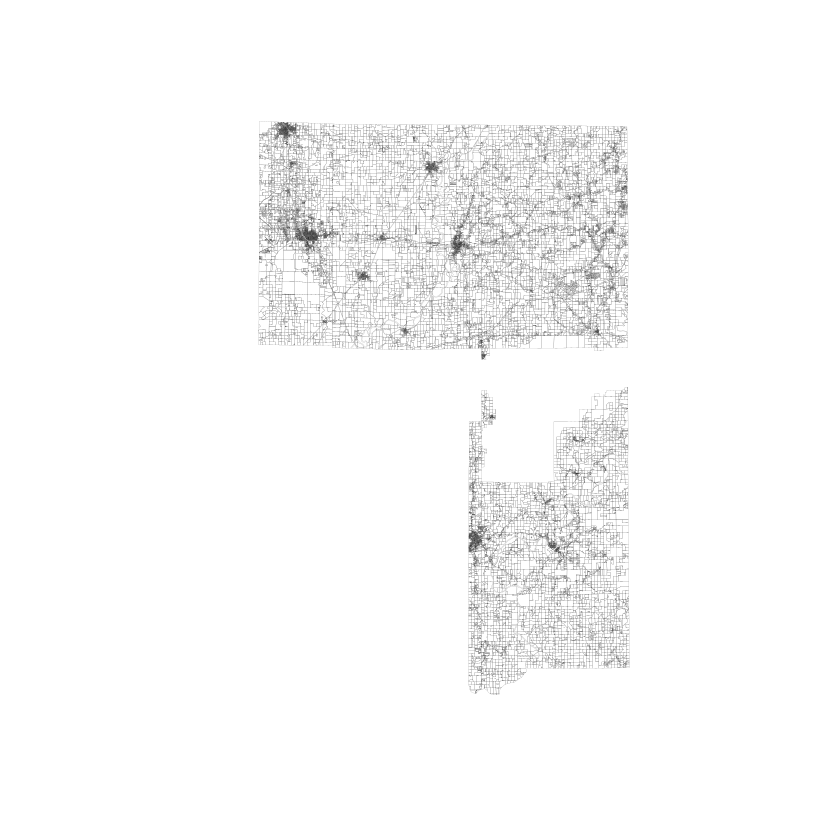

In [15]:
# Naval Support Activity Crane
plot(combined_data$geometry, lwd = 0.05)

In [19]:
combined_data <- load_and_bind_counties(c('BARTHOLOMEW','JOHNSON','BROWN'))

Reading layer `BARTHOLOMEW' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/BARTHOLOMEW.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 38359 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 579281.5 ymin: 4321155 xmax: 613505.7 ymax: 4356448
Projected CRS: NAD83 / UTM zone 16N


Shapefile for BARTHOLOMEW has been loaded.



Reading layer `JOHNSON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/JOHNSON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 69389 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 564324.8 ymin: 4354972 xmax: 590301.4 ymax: 4388147
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JOHNSON has been loaded.



Reading layer `BROWN' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/BROWN.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 16158 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 553299.7 ymin: 4322344 xmax: 579648.3 ymax: 4355442
Projected CRS: NAD83 / UTM zone 16N


Shapefile for BROWN has been loaded.

All selected shapefiles have been successfully combined into combined_data.



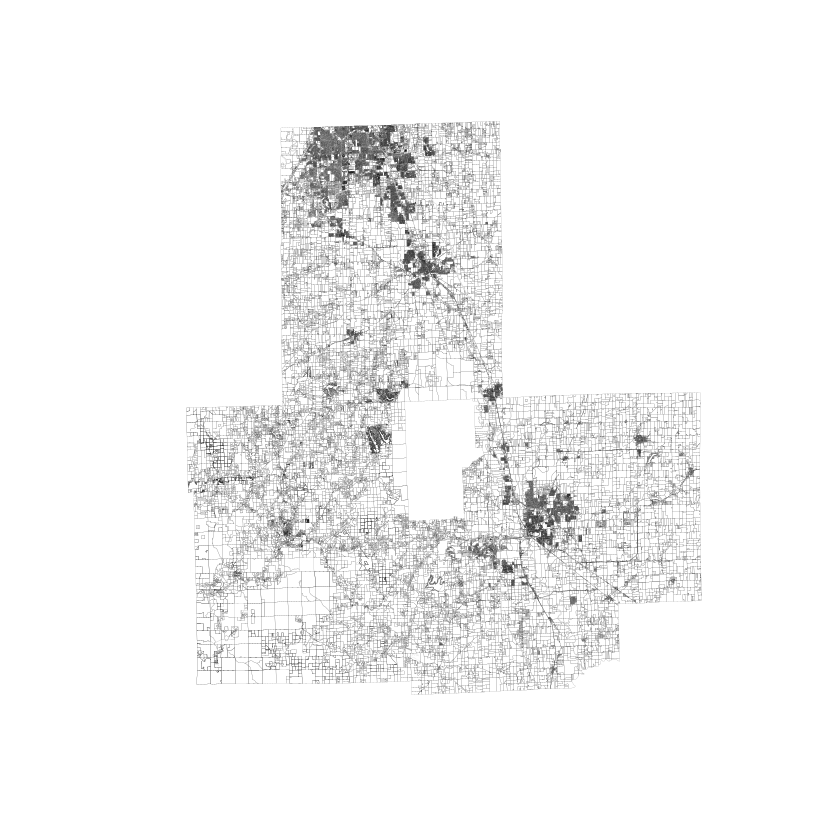

In [20]:
# Camp Atterbury
plot(combined_data$geometry, lwd = 0.05)

In [21]:
combined_data <- load_and_bind_counties(c('RIPLEY','JENNINGS','JEFFERSON'))

Reading layer `RIPLEY' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/RIPLEY.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 18478 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 634668.8 ymin: 4308333 xmax: 666816.6 ymax: 4352969
Projected CRS: NAD83 / UTM zone 16N


Shapefile for RIPLEY has been loaded.



Reading layer `JENNINGS' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/JENNINGS.shp' 
  using driver `ESRI Shapefile'


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."
Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
"GDAL Message 1: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection."


Simple feature collection with 20745 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 603746.9 ymin: 4296046 xmax: 634825.9 ymax: 4339695
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JENNINGS has been loaded.



Reading layer `JEFFERSON' from data source 
  `/anvil/projects/x-cis220051/sps/tippecanoe-project/geosources/Parcels/JEFFERSON.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 20209 features and 25 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 614242.7 ymin: 4271923 xmax: 656405.2 ymax: 4308753
Projected CRS: NAD83 / UTM zone 16N


Shapefile for JEFFERSON has been loaded.

All selected shapefiles have been successfully combined into combined_data.



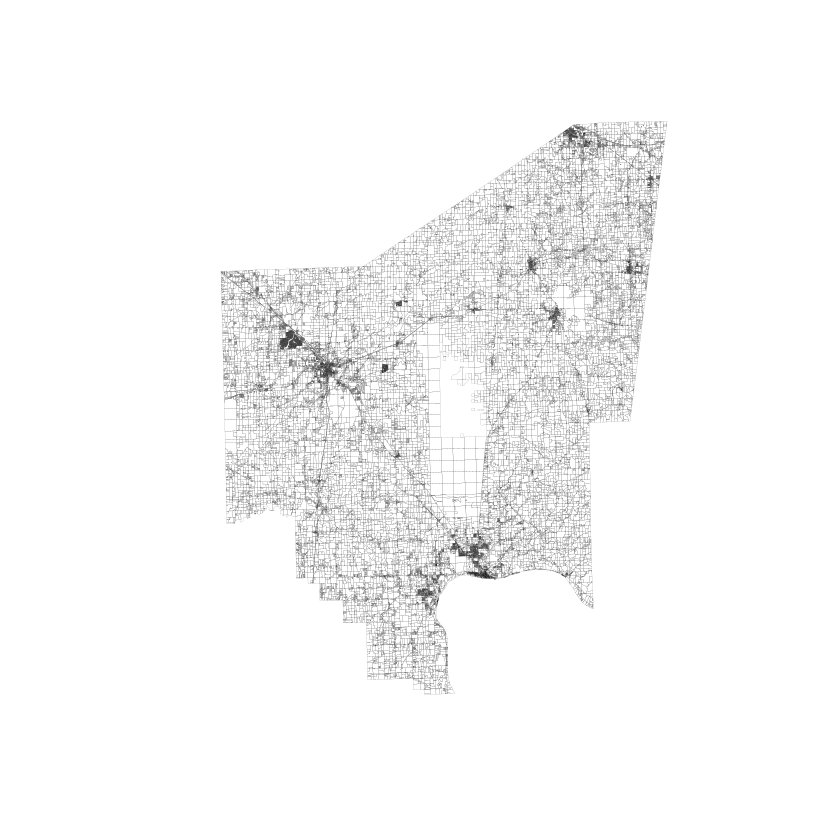

In [22]:
# Big Oaks National Wildlife
plot(combined_data$geometry, lwd = 0.05)